# HW

In [80]:
import numpy as np
import pandas as pd

##### Загрузите датасет titanic.csv

In [81]:
df_titanic = pd.read_csv('titanic.csv')

In [82]:
df_titanic[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df_titanic.shape

(891, 12)

In [84]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


> Обратите внимание на разное количество значений переменных
Если это так - то у вас пропуски в данных. Такое бывает. 
Например в этом датасете не получилось выяснить всех подробностей у некоторых людей в виду утери данных, невозможности узнать или восстановить их

In [85]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> Давайте возьмем для начала только несколько признаков, позже - вы увеличите их количество и сделаете соответствующую обработку.

In [86]:
columns = ['Sex', 'Age', 'Pclass', 'Survived']

In [87]:
simple_train = df_titanic[columns][:500]
simple_test = df_titanic[columns][500:]

> мы пока не умеем на уровне алгоритма работать с пропущенными значениями. 
Представьте вам дают 5-мерный вектор у которого заполнены только три компоненты и другой такой же вектор но у него заполнены лишь две  компоненты.  Как померить их сходство????

distance_between( [1,0,1, NaN, NaN], [NaN, 1, 1, NaN, NaN] )


> один из вариантов - заполнить какими то значениями - например если это возраст - то заполнить средним по датасету или нулем.

>> на будущее - в sklearn есть такой модуль - http://scikit-learn.org/stable/modules/impute.html но сейчас можете заполнить пропуски средствами pandas - метод fillna()

##### Заполните пропущенные значения чем нибудь

In [88]:
import math
simple_train = simple_train.fillna(math.floor(simple_train.Age.mean()))
simple_test = simple_test.fillna(math.floor(simple_test.Age.mean()))
# можно inplace делать такое, а можно переприсваивать.

> мы чемпионы. Но мы понимаем, что алгоритм у нас метрический - он не понимает как померить близость векторов в которых содержатся строки

distance( [1,1,0,'мужик'], [1, 0, 1, 'принцесска'] )

> поэтому давайте заведем признак is_man который будет принимать значение 0 или 1.

##### Заведите бинарный признак отвечающий за пол. Строковый удалите

хинт - есть метод apply()

In [89]:
simple_train.Sex = simple_train.Sex.apply(lambda x: 1 if x == 'male' else 0)
simple_test.Sex = simple_test.Sex.apply(lambda x: 1 if x == 'male' else 0)

##### Сформируйте трейн и тест выборку, где в X лежат признаки 'Sex', 'Age', 'Pclass', а в у - Survived

Результат - numpy array

hint - у pandas есть метод drop() и атрибут values; Пощупайте их

In [90]:
#X_train = simple_train[['Sex','Age','Pclass']]
X_train = simple_train.drop('Survived',axis = 1).values
X_test = simple_test.drop('Survived',axis = 1).values
y_train = simple_train['Survived'].values
y_test = simple_test['Survived'].values


In [91]:
assert isinstance(X_train, np.ndarray)
assert isinstance(X_test, np.ndarray)
assert isinstance(y_train, np.ndarray)
assert isinstance(y_test, np.ndarray)

In [92]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [93]:
assert not np.any(np.isnan(X_train)), 'у вас в данных есть пропущенные значения. Заполните их или удалите'
assert not np.any(np.isnan(X_test)), 'у вас в данных есть пропущенные значения. Заполните их или удалите'

In [94]:
from numpy import linalg as LA

##### Реализуйте KNN. Сами, как делали это на лекции. 

Можете улучшить его.
(например использовать kd-tree для быстрого поиска ближайших соседей, 
 или обходить соседей и класть расстояния в мин-кучу - тогда вы быстрее будете набирать их, без сортировки.)

In [95]:
import numpy as np
import pandas as pd
from numpy import linalg as LA

def sort_col(i):
    return i[1]

class KNN:
    """
    simple KNN classifier with O(n) complexity for memory,
    and O(n log n) complexity - for nn search.
    """

    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_hat = []
        assert len(X_test.shape) == 2
        for i in range(len(X_test)):
            test_Dist = LA.norm((X_test[i] - self.X_train), axis=1)
            test_Dist = list(zip(self.y_train, test_Dist))
            test_Dist.sort(key=sort_col, reverse=False)
            test_Dist = test_Dist[:self.k]
            golos = [0, 0]
            for i in test_Dist:
                golos[i[0]] += 1
            y_hat.append(golos.index(max(golos)))
        return np.array(y_hat)

knn = KNN(5)

In [96]:
knn = KNN(5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

##### посчитайте руками (не используя sklearn) качество вашего предсказания

In [97]:
acc = np.mean(y_pred == y_test)
print('доля правильных ответов:', acc)

доля правильных ответов: 0.7698209718670077


In [98]:
np.unique(y_pred)

array([0, 1])

> Мы получили бейслайн решение. Оно должно давать скорр в районе 0.76

____

In [99]:
### можете проверить себя

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7698209718670077


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf=KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

np.unique(y_pred)

print(accuracy_score(y_test, y_pred))

0.7774936061381074


##### TODO продолжение домашки

In [101]:
columns = ['Sex', 'Age', 'Pclass', 'Fare', 'Embarked', 'Survived']

In [105]:
# все возможные значения без Nan
l1 = list(df_titanic['Embarked'].unique())
l1 = l1[:len(l1)-1]
l1

['S', 'C', 'Q']

In [106]:
#заменяем NaN в Embarked случайным другим значением
import math
import random
df1 =  df_titanic[columns]
df1.Age = df1.Age.fillna(math.floor(df1.Age.mean()))
df1.Embarked = df1.Embarked.fillna(random.choice(l1))
df1.Sex = df1.Sex.apply(lambda x: 1 if x == 'male' else 0)
df1[:5]

/home/dencerr/.local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Sex,Age,Pclass,Fare,Embarked,Survived
0,1,22.0,3,7.2500,S,0
1,0,38.0,1,71.2833,C,1
2,0,26.0,3,7.9250,S,1
3,0,35.0,1,53.1000,S,1
4,1,35.0,3,8.0500,S,0


In [107]:
#one hot encoding
for i in l1:
    df1[i] = pd.Series(df1['Embarked'].apply(lambda x: 1 if x == i else 0), index=df1.index)
del df1['Embarked']
df1[:5]

/home/dencerr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sex,Age,Pclass,Fare,Survived,S,C,Q
0,1,22.0,3,7.2500,0,1,0,0
1,0,38.0,1,71.2833,1,0,1,0
2,0,26.0,3,7.9250,1,1,0,0
3,0,35.0,1,53.1000,1,1,0,0
4,1,35.0,3,8.0500,0,1,0,0


In [108]:
simple_train = df1[:500]
simple_test = df1[500:]

In [109]:
#X_train = simple_train[['Sex','Age','Pclass']]
X_train = simple_train.drop('Survived',axis = 1).values
X_test = simple_test.drop('Survived',axis = 1).values
y_train = simple_train['Survived'].values
y_test = simple_test['Survived'].values


In [110]:
X_train[:5]

array([[ 1.    , 22.    ,  3.    ,  7.25  ,  1.    ,  0.    ,  0.    ],
       [ 0.    , 38.    ,  1.    , 71.2833,  0.    ,  1.    ,  0.    ],
       [ 0.    , 26.    ,  3.    ,  7.925 ,  1.    ,  0.    ,  0.    ],
       [ 0.    , 35.    ,  1.    , 53.1   ,  1.    ,  0.    ,  0.    ],
       [ 1.    , 35.    ,  3.    ,  8.05  ,  1.    ,  0.    ,  0.    ]])

In [111]:
knn = KNN(5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [112]:
acc = np.mean(y_pred == y_test)
print('доля правильных ответов:', acc)

доля правильных ответов: 0.6956521739130435


15


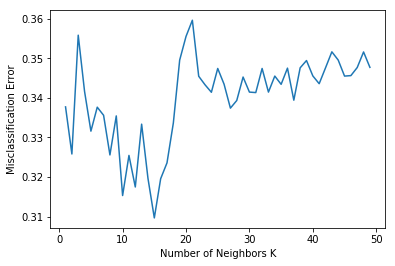

In [113]:
#find optimal k
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

k_list = list(range(1,50))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
#misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = k_list[MSE.index(min(MSE))]
print(optimal_k)

# plot misclassification error vs k
plt.plot(k_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [114]:
knn = KNN(optimal_k)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [115]:
acc = np.mean(y_pred == y_test)
print('доля правильных ответов:', acc)

доля правильных ответов: 0.710997442455243
